# How to mount an external hard drive to Raspberry Pi

Mounting drives is an important skill to have when it comes to working hard drives and file structures in Linux. Once you have a general understanding, it becomes a pretty easy task.

# Step 1: Gather all required components

We'll need several components to complete this project, some of which you may already have lying around:
- [Raspberry Pi 4](https://www.raspberrypi.org/products/raspberry-pi-4-model-b/)
- [A power supply](https://www.raspberrypi.org/products/type-c-power-supply/)
- [microSD card](https://www.pbtech.co.nz/product/MEMSAM11022/Samsung-EVO-PLUS-64GB-Micro-SD-with-Adapter---up-t)
- [External HDD](https://www.pbtech.co.nz/product/HDDWDX2721/WD-Elements-SE-Portable-2TB-25-USB-30-External-HDD)
- [HMDI - microHDMI cable](https://www.raspberrypi.org/products/micro-hdmi-to-standard-hdmi-a-cable/)
- Any keyboard, mouse and HMDI compatible computer monitor

# Step 2: Identify disks for mounting

We first need to find out the filesystem name for the drive we want to mount to our Raspberry Pi

We'll be using the "df" command as below

*df -h*

The following output is expected


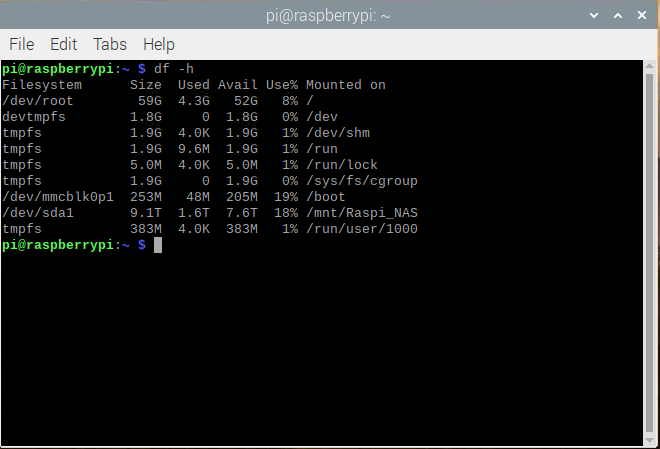

In [1]:
from IPython import display

display.Image("./Images/RaspberryPi_Mount1.png")

This results in a list of all connected storage devices, the name of their filesystem and where they are currently mounted on. We'll use this to identify the drive we want to mount. 

In this tutorial, we'll be mounting **Raspi_NAS** drive to our Raspberry Pi. Note: Most external drives will be referenced under the **/dev/sd**** filesystem name. 

We see that this entry matches what we're after:

/dev/sda1       9.1T  1.6T  7.6T  18% /mnt/Raspi_NAS


# Step 3: Retrive Disk UUID and Type

We'll need to take the filesystem name we retrieved in the previous section to find both the **UUID** (**U**niversal **U**nique **Id**entifier) and the **type** of drive.

Run the following command to retrieve this information specific to the drive entry we identified earlier:

*sudo blkid /dev/sda1*

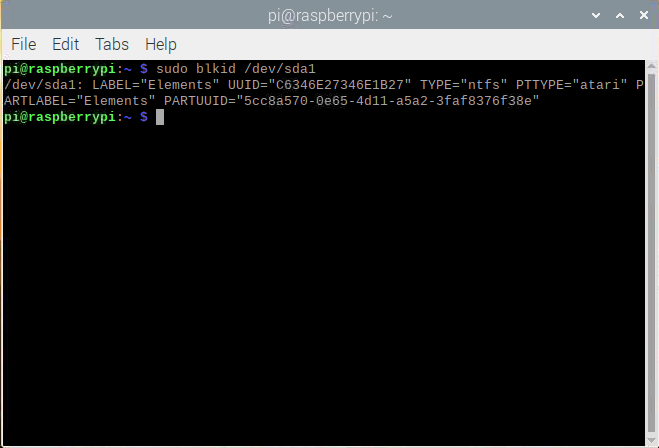

In [2]:
display.Image("./Images/RaspberryPi_Mount2.png")

From this we can see that both UUID and type are returned. Please make a note on both the **UUID** and **type**.

# Step 4: Additional drivers

Depending on the **type** of your filesystem, you may need to install additional drivers.

If you are using a drive that has a type of **ntfs or exFAT**, you will need to follow the appropriate steps below. Otherwise, you can continue to the next section.

**NFTS**

*sudo apt install ntfs-3g*

**exFAT**

*sudo apt install exfat-fuse   
sudo apt install exfat-utils*

# Step 5: Mount the drive to Raspberry Pi

Now that we've got the UUID, type and installed the additional drivers (if needed), we can now mount the drive.

### Make new directory to mount our drive to

We can do this by running the following command. You can name the folder we are mounting anything, but for this tutorial, we will be using the name *Raspi_NAS*.

*sudo mkdir -p /mnt/Raspi_NAS*

### Giving permissions to the new folder

We need appropriate permissions set-up to access the drive mounted in this new folder

*sudo chown -R pi:pi /mnt/Raspi_NAS*

### Modify the fstab file

This file controls how drives are mounted to your Raspberry Pi

*sudo nano /etc/fstab*

This should open up a file, where you'll need to add the following to the bottom, replacing **[UUID]** and **[TYPE]** with their required values.

UUID=**[UUID]** /mnt/usb1 **[TYPE]** defaults,auto,users,rw,nofail,noatime 0 0

Once done, save the file by pressing **CTRL** + **X**, followed by **Y** and then the **ENTER** key.

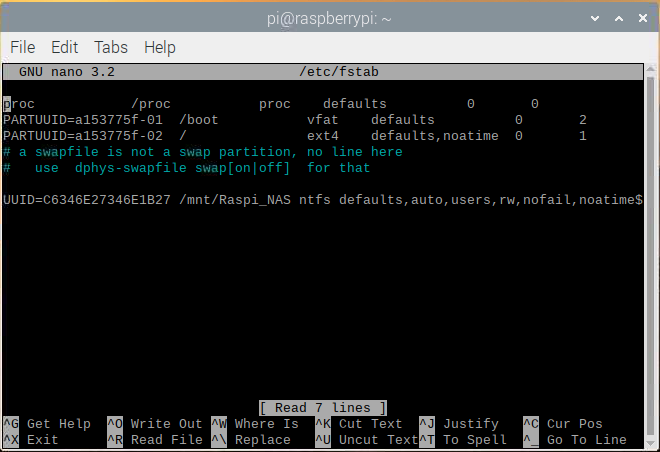

In [4]:
display.Image("./Images/RaspberryPi_Mount3.png")

# Step 5: Checking the mounted drive

We'll need to unmount and mount the drive to ensure the changes made to the fstab file have taken. (Replace **/dev/sda1** with the filesystem name you found earlier).

### Unmount the drive

*sudo umount /dev/sda1*

### Mount the drive again

*sudo mount -a*

### Making sure the drives are restored after Pi has been restarted

*sudo reboot*

The drives should automatically be mounted after the Raspberry Pi has finished rebooting.